In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("kaggle.csv")
dataset

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate
...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing
450174,http://atualizapj.com/,phishing


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   type    450176 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


In [4]:
dataset['type'].value_counts()

type
legitimate    345738
phishing      104438
Name: count, dtype: int64

C:\Users\yogendra singh\AppData\Local\Temp\ipykernel_15220\3895947487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index,y=type_counts.values,palette=['green','red'])


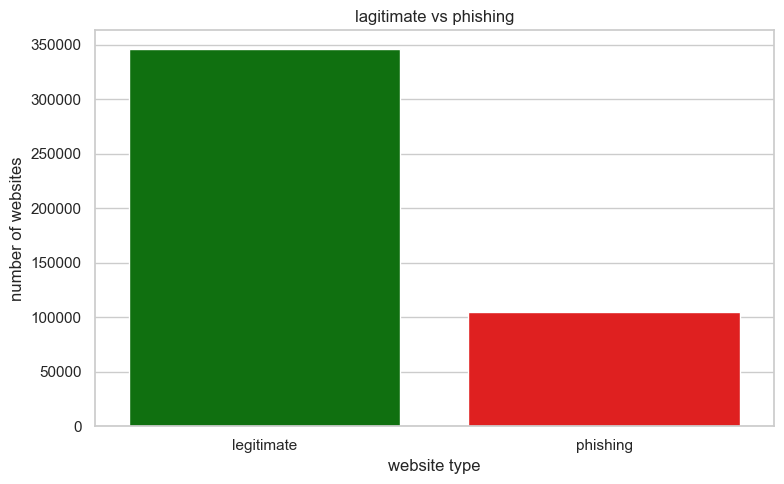

In [5]:
sns.set(style='whitegrid')

type_counts=dataset['type'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=type_counts.index,y=type_counts.values,palette=['green','red'])
plt.title("lagitimate vs phishing")
plt.xlabel("website type", fontsize=12)  # Changed from font_size to fontsize
plt.ylabel("number of websites",fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
##removing unnecessary columns-index
dataset=dataset.drop(columns=['Unnamed:0'],errors='ignore')
dataset

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate
...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing
450174,http://atualizapj.com/,phishing


In [7]:
dataset.describe()

,url,type
count,450176,450176
unique,450176,2
top,https://www.google.com,legitimate
freq,1,345738


In [8]:

dataset.isna().sum()

url     0
type    0
dtype: int64

In [9]:
#removing duplicate and null values
dataset=dataset.drop_duplicates()
dataset=dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   type    450176 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


In [10]:
##labelling the dataset '0' for legitimate and '1' for phishing
dataset['label']=dataset['type'].map({'legitimate':0,'phishing':1})
dataset

,url,type,label
0,https://www.google.com,legitimate,0
1,https://www.youtube.com,legitimate,0
2,https://www.facebook.com,legitimate,0
3,https://www.baidu.com,legitimate,0
4,https://www.wikipedia.org,legitimate,0
...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,phishing,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1
450173,http://faboleena.com/js/infortis/jquery/plugin...,phishing,1
450174,http://atualizapj.com/,phishing,1


In [11]:
dataset['label'].value_counts()

label
0    345738
1    104438
Name: count, dtype: int64

In [12]:
##balancing the dataset using sklearn.utils 
from sklearn.utils import resample
##separating majority and minority classes
legit=dataset[dataset['label']==0]
phishing=dataset[dataset['label']==1]

#downsample legitimate class beucase it is in faar majority
legit_downsampled=resample(
    legit,
    replace=False,   #sample without replacement
    n_samples=len(phishing),   #match majority class
    random_state=42
)

balanced_dataset=pd.concat([legit_downsampled,phishing])

#shuffle the dataset
balanced_dataset=balanced_dataset.sample(frac=1,random_state=42).reset_index(drop=True)
balanced_dataset['label'].value_counts()

label
1    104438
0    104438
Name: count, dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   type    450176 non-null  object
 2   label   450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


C:\Users\yogendra singh\AppData\Local\Temp\ipykernel_15220\1930568351.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index,y=type_counts.values,palette=['green','red'])


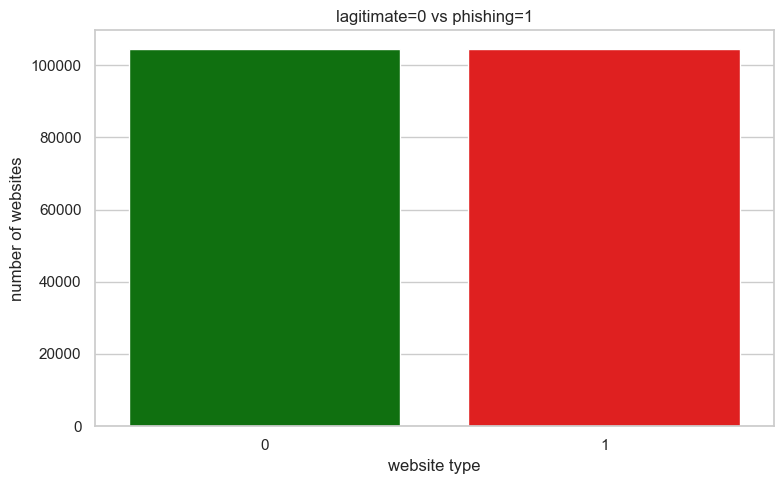

In [14]:
sns.set(style='whitegrid')

type_counts=balanced_dataset['label'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=type_counts.index,y=type_counts.values,palette=['green','red'])
plt.title("lagitimate=0 vs phishing=1")
plt.xlabel("website type", fontsize=12)  # Changed from font_size to fontsize
plt.ylabel("number of websites",fontsize=12)
plt.tight_layout()
plt.show()

In [15]:
balanced_dataset.isna().sum()

url      0
type     0
label    0
dtype: int64

In [16]:
##most important step in data cleaning
##feature extraction from urls

In [17]:
import re
import tldextract
from urllib.parse import urlparse

SHORTENERS = ['bit.ly', 'tinyurl', 'goo.gl', 'ow.ly', 'is.gd', 'buff.ly']
SUSPICIOUS_KEYWORDS = ['login', 'secure', 'account', 'update', 'bank', 'verify']
TRUSTED_DOMAINS = [
    'google.com', 'facebook.com', 'youtube.com', 'microsoft.com',
    'amazon.com', 'apple.com', 'linkedin.com', 'github.com',
    'wikipedia.org', 'instagram.com', 'twitter.com'
]

def extract_safe_features(url):
    features = {}
    try:
        url = str(url).strip()

        # Basic structure-based features
        features['url_length'] = len(url)
        features['num_dots'] = url.count('.')
        features['has_ip'] = int(bool(re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', url)))
        features['has_at'] = int('@' in url)
        features['has_dash'] = int('-' in url)

        parsed = urlparse(url)
        features['path_length'] = len(parsed.path)
        features['num_query_params'] = len(parsed.query.split('&')) if parsed.query else 0
        features['is_https'] = int(parsed.scheme == 'https')

        ext = tldextract.extract(url)
        domain = ext.domain
        suffix = ext.suffix
        registered_domain = f"{domain}.{suffix}"

        features['domain_length'] = len(domain)
        features['tld_length'] = len(suffix)

        features['is_shortened'] = int(any(short in url for short in SHORTENERS))
        features['suspicious_keywords_count'] = sum(keyword in url.lower() for keyword in SUSPICIOUS_KEYWORDS)
        features['is_trusted_domain'] = int(registered_domain in TRUSTED_DOMAINS)

    except Exception as e:
        # If any error occurs, return safe defaults (all zeros)
        features = {
            'url_length': 0,
            'num_dots': 0,
            'has_ip': 0,
            'has_at': 0,
            'has_dash': 0,
            'path_length': 0,
            'num_query_params': 0,
            'is_https': 0,
            'domain_length': 0,
            'tld_length': 0,
            'is_shortened': 0,
            'suspicious_keywords_count': 0,
            'is_trusted_domain': 0
        }
    return features


In [18]:
# Extract features as a DataFrame
features_df = balanced_dataset['url'].apply(extract_safe_features).apply(pd.Series)

# Join with the original dataset (adds features to balanced_dataset)
balanced_dataset = pd.concat([balanced_dataset, features_df], axis=1)
balanced_dataset

,url,type,label,url_length,num_dots,has_ip,has_at,has_dash,path_length,num_query_params,is_https,domain_length,tld_length,is_shortened,suspicious_keywords_count,is_trusted_domain
0,http://itctechnicalsolutions.com/Mindurshit.co...,phishing,1,55,2,0,0,0,23,0,0,21,3,0,0,0
1,https://www.electronichouse.com/article/ps3_ad...,legitimate,0,75,2,0,0,0,44,0,1,15,3,0,0,0
2,https://www.linkedin.com/in/larrymartinkimpel,legitimate,0,45,2,0,0,0,21,0,1,8,3,0,0,1
3,https://www.kansascity.com/2011/03/05/2700249/...,legitimate,0,83,3,0,0,1,57,0,1,10,3,0,0,0
4,https://www.en.wikipedia.org/wiki/Dem_Bones,legitimate,0,43,3,0,0,0,15,0,1,9,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208871,http://e-apicultura.ro/91019292018/,phishing,1,35,1,0,0,1,13,0,0,12,2,0,0,0
208872,https://www.theruckus.wordpress.com/,legitimate,0,36,3,0,0,0,1,0,1,9,3,0,0,0
208873,http://upsidegastrobar.com.br/uploads/login.al...,phishing,1,141,5,0,0,1,37,1,0,15,6,0,1,0
208874,http://editions-liroli.net/js/index.html?txt/,phishing,1,45,2,0,0,1,14,1,0,15,3,0,0,0


In [19]:
balanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208876 entries, 0 to 208875
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   url                        208876 non-null  object
 1   type                       208876 non-null  object
 2   label                      208876 non-null  int64 
 3   url_length                 208876 non-null  int64 
 4   num_dots                   208876 non-null  int64 
 5   has_ip                     208876 non-null  int64 
 6   has_at                     208876 non-null  int64 
 7   has_dash                   208876 non-null  int64 
 8   path_length                208876 non-null  int64 
 9   num_query_params           208876 non-null  int64 
 10  is_https                   208876 non-null  int64 
 11  domain_length              208876 non-null  int64 
 12  tld_length                 208876 non-null  int64 
 13  is_shortened               208876 non-null  

In [20]:
balanced_dataset = balanced_dataset.loc[:, ~balanced_dataset.columns.duplicated()]


In [21]:
balanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208876 entries, 0 to 208875
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   url                        208876 non-null  object
 1   type                       208876 non-null  object
 2   label                      208876 non-null  int64 
 3   url_length                 208876 non-null  int64 
 4   num_dots                   208876 non-null  int64 
 5   has_ip                     208876 non-null  int64 
 6   has_at                     208876 non-null  int64 
 7   has_dash                   208876 non-null  int64 
 8   path_length                208876 non-null  int64 
 9   num_query_params           208876 non-null  int64 
 10  is_https                   208876 non-null  int64 
 11  domain_length              208876 non-null  int64 
 12  tld_length                 208876 non-null  int64 
 13  is_shortened               208876 non-null  

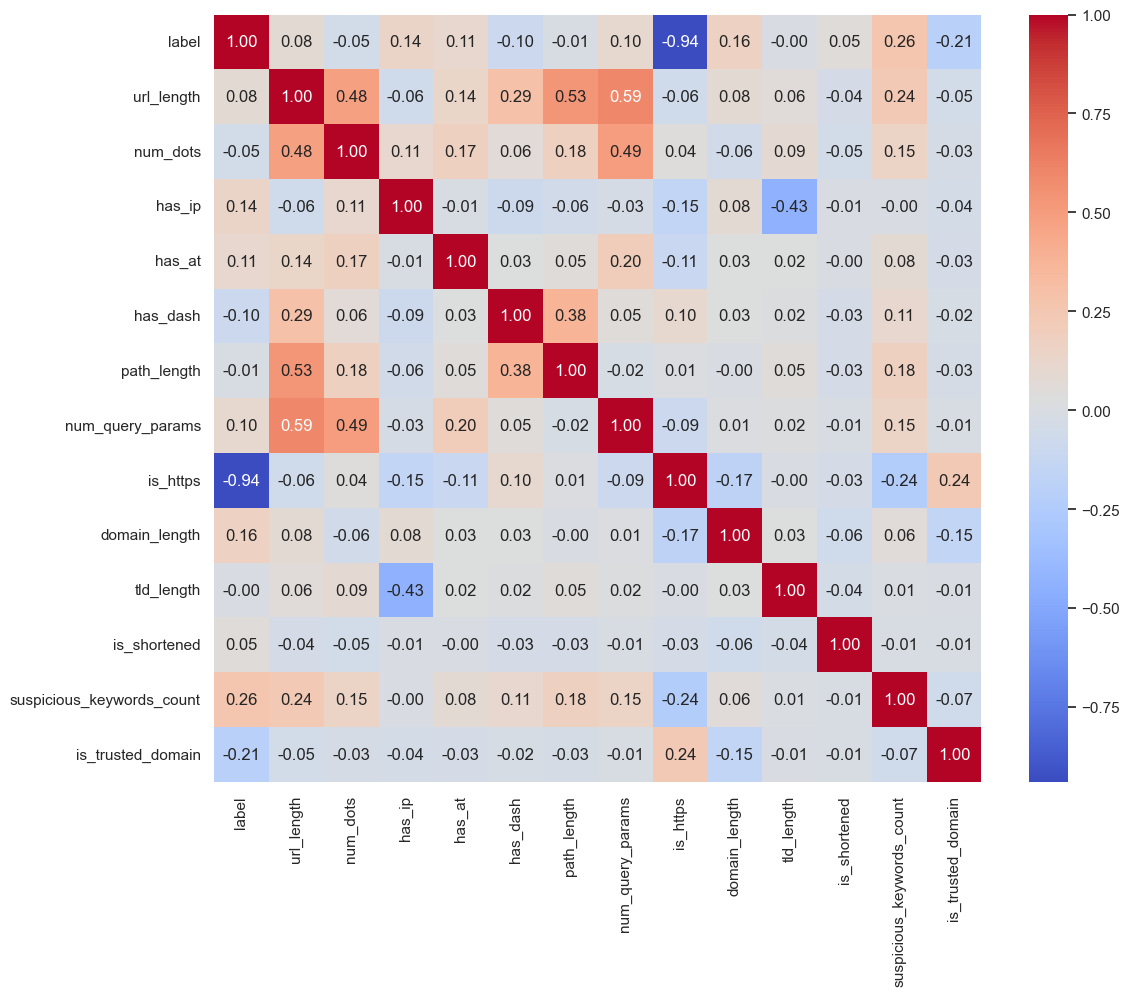

In [22]:
##correlation matrix to see which columns effects the result most and which least
correlation_matrix=balanced_dataset.drop(columns=['url','type']).corr()

##plotting heatmap

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',square=True)
plt.tight_layout()
plt.show()

C:\Users\yogendra singh\AppData\Local\Temp\ipykernel_15220\1577982828.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


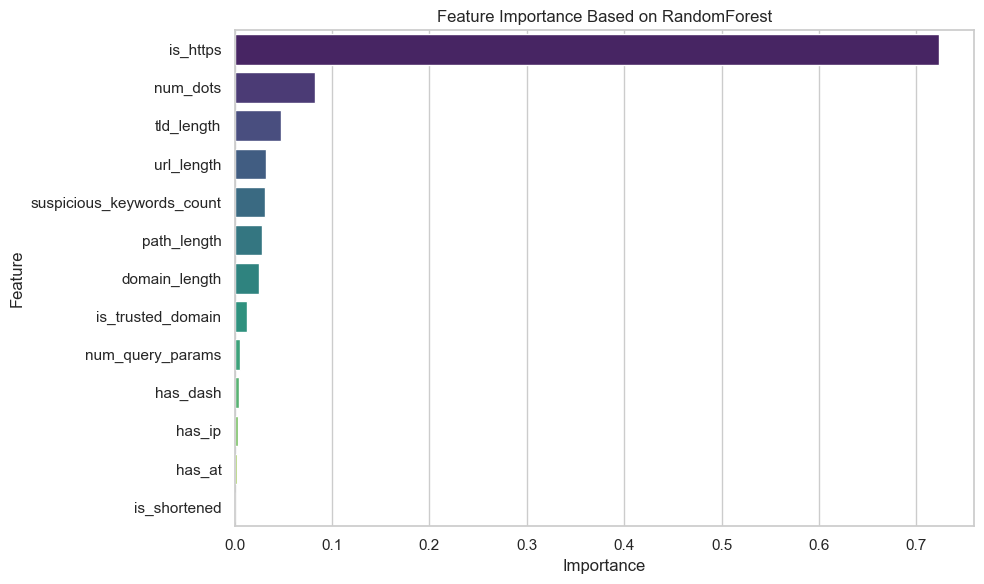

In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train model for importance extraction
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X = balanced_dataset.drop(columns=['url', 'type', 'label'])
y = balanced_dataset['label']
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance Based on RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [24]:
balanced_df=balanced_dataset[['has_at', 'is_shortened', 'num_query_params']]

In [25]:
balanced_df

,has_at,is_shortened,num_query_params
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
208871,0,0,0
208872,0,0,0
208873,0,0,1
208874,0,0,1


In [26]:
balanced_dataset

,url,type,label,url_length,num_dots,has_ip,has_at,has_dash,path_length,num_query_params,is_https,domain_length,tld_length,is_shortened,suspicious_keywords_count,is_trusted_domain
0,http://itctechnicalsolutions.com/Mindurshit.co...,phishing,1,55,2,0,0,0,23,0,0,21,3,0,0,0
1,https://www.electronichouse.com/article/ps3_ad...,legitimate,0,75,2,0,0,0,44,0,1,15,3,0,0,0
2,https://www.linkedin.com/in/larrymartinkimpel,legitimate,0,45,2,0,0,0,21,0,1,8,3,0,0,1
3,https://www.kansascity.com/2011/03/05/2700249/...,legitimate,0,83,3,0,0,1,57,0,1,10,3,0,0,0
4,https://www.en.wikipedia.org/wiki/Dem_Bones,legitimate,0,43,3,0,0,0,15,0,1,9,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208871,http://e-apicultura.ro/91019292018/,phishing,1,35,1,0,0,1,13,0,0,12,2,0,0,0
208872,https://www.theruckus.wordpress.com/,legitimate,0,36,3,0,0,0,1,0,1,9,3,0,0,0
208873,http://upsidegastrobar.com.br/uploads/login.al...,phishing,1,141,5,0,0,1,37,1,0,15,6,0,1,0
208874,http://editions-liroli.net/js/index.html?txt/,phishing,1,45,2,0,0,1,14,1,0,15,3,0,0,0


In [27]:
balanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208876 entries, 0 to 208875
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   url                        208876 non-null  object
 1   type                       208876 non-null  object
 2   label                      208876 non-null  int64 
 3   url_length                 208876 non-null  int64 
 4   num_dots                   208876 non-null  int64 
 5   has_ip                     208876 non-null  int64 
 6   has_at                     208876 non-null  int64 
 7   has_dash                   208876 non-null  int64 
 8   path_length                208876 non-null  int64 
 9   num_query_params           208876 non-null  int64 
 10  is_https                   208876 non-null  int64 
 11  domain_length              208876 non-null  int64 
 12  tld_length                 208876 non-null  int64 
 13  is_shortened               208876 non-null  

In [28]:
from sklearn.model_selection import train_test_split

x=balanced_dataset.drop(columns=['url','type','label'])
y=balanced_dataset['label']

##performing train test split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,stratify=y,random_state=42
)

#check shape of each set

print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (167100, 13)
X_test: (41776, 13)
y_train: (167100,)
y_test: (41776,)


In [29]:
###training the model

In [30]:
from sklearn.ensemble import RandomForestClassifier

#create and train model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9895394484871697

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     20888
           1       1.00      0.98      0.99     20888

    accuracy                           0.99     41776
   macro avg       0.99      0.99      0.99     41776
weighted avg       0.99      0.99      0.99     41776



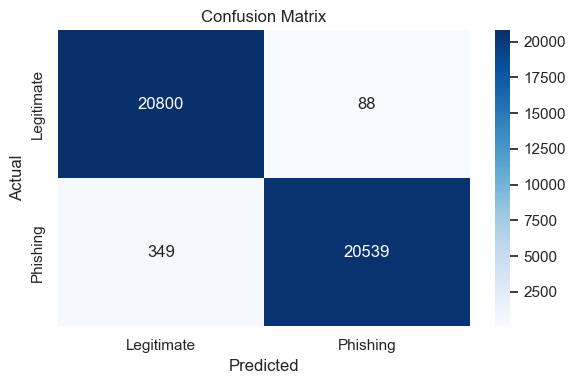

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = rf_model.predict(x_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [32]:
import joblib
joblib.dump(rf_model, "phishing_detector_model.pkl")


['phishing_detector_model.pkl']

In [33]:
import re
import tldextract
from urllib.parse import urlparse
import pandas as pd
import joblib

# 🎯 Load the trained model
rf_model = joblib.load("phishing_detector_model.pkl")

# ✅ Define trusted and suspicious domains
SHORTENERS = ['bit.ly', 'tinyurl', 'goo.gl', 'ow.ly', 'is.gd', 'buff.ly']
SUSPICIOUS_KEYWORDS = ['login', 'secure', 'account', 'update', 'bank', 'verify']
TRUSTED_DOMAINS = [
    'google.com', 'facebook.com', 'youtube.com', 'microsoft.com',
    'amazon.com', 'apple.com', 'linkedin.com', 'github.com',
    'wikipedia.org', 'instagram.com', 'twitter.com'
]



# ✅ Feature extraction function (must match training phase)
def extract_safe_features(url):
    features = {}
    url = str(url).strip()

    features['url_length'] = len(url)
    features['num_dots'] = url.count('.')
    features['has_ip'] = int(bool(re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', url)))
    features['has_at'] = int('@' in url)
    features['has_dash'] = int('-' in url)

    parsed = urlparse(url)
    features['path_length'] = len(parsed.path)
    features['num_query_params'] = len(parsed.query.split('&')) if parsed.query else 0
    features['is_https'] = int(parsed.scheme == 'https')

    ext = tldextract.extract(url)
    domain = ext.domain
    suffix = ext.suffix
    registered_domain = f"{domain}.{suffix}"

    features['domain_length'] = len(domain)
    features['tld_length'] = len(suffix)
    features['is_shortened'] = int(any(short in url for short in SHORTENERS))
    features['suspicious_keywords_count'] = sum(keyword in url.lower() for keyword in SUSPICIOUS_KEYWORDS)
    features['is_trusted_domain'] = int(registered_domain in TRUSTED_DOMAINS)

    return features

# ✅ Test URLs (you can change these)
test_urls = [
    'https://google.com',
    'https://secure-login.amazon.support-domain.ru',
    'https://bit.ly/3xYz78',
    'http://facebook.com.verify-login.ru',
    'https://www.nptel.ac.in/',
    'http://192.168.1.1/login.php'
]

# 🔍 Extract features
features_list = [extract_safe_features(url) for url in test_urls]
test_df = pd.DataFrame(features_list)

# 🔮 Predict
predictions = rf_model.predict(test_df)
probabilities = rf_model.predict_proba(test_df)

# 📋 Show Results
for url, features, pred, prob in zip(test_urls, features_list, predictions, probabilities):
    domain_safe = is_whitelisted(url)
    if domain_safe:
        label = "Legitimate (whitelisted)"
        confidence = "100.0"
    else:
        label = "Phishing" if pred == 1 else "Legitimate"
        confidence = round(max(prob) * 100, 2)
    print(f"{url}\n  → Prediction: {label} (Confidence: {confidence}%)\n")


NameError: name 'is_whitelisted' is not defined